In [1]:
import pandas as pd

In [5]:
chartbuster = pd.read_csv(r"C:\Users\sethi\Desktop\100-days-of-Applied-AI\data set\Data_Train.csv")

In [6]:
chartbuster.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score

In [10]:
chartbuster.tail()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
78453,1144131,Resident Advisor,ambient,AU,RA.505 Josey Rebelle,2016-02-08 09:11:33.000000,12221,19,489,47,143726
78454,1415261,Trap Sounds,trap,AU,Drama We Cause - Lurtz [Exclusive],2016-03-02 01:24:39.000000,8265,4,292,100,211419
78455,705157,Mixmag,electronic,AU,Premiere: ELLLL 'SKITTLES',2019-02-11 13:15:05.000000,3621,1,157,31,1403057
78456,175337,DHA AM (Deep House London),electronic,AU,Night Vision - DHL Mix #124,2017-01-18 10:10:12.000000,8896,24,371,89,143743
78457,501778,Jon Z ✅,all-music,AU,Energy Freestyle,2015-04-11 22:32:05.000000,102487,4,"1,829",71,89084


In [11]:
chartbuster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78458 entries, 0 to 78457
Data columns (total 11 columns):
Unique_ID     78458 non-null int64
Name          78458 non-null object
Genre         78458 non-null object
Country       78458 non-null object
Song_Name     78457 non-null object
Timestamp     78458 non-null object
Views         78458 non-null int64
Comments      78458 non-null int64
Likes         78458 non-null object
Popularity    78458 non-null object
Followers     78458 non-null int64
dtypes: int64(4), object(7)
memory usage: 6.6+ MB


In [12]:
chartbuster.describe()

,Unique_ID,Views,Comments,Followers
count,7.845800e+04,7.845800e+04,78458.000000,7.845800e+04
mean,7.451701e+05,5.469686e+05,115.270973,4.787663e+05
std,4.805507e+05,3.883085e+06,724.614868,1.168120e+06
min,0.000000e+00,0.000000e+00,0.000000,1.000000e+00
25%,3.149512e+05,6.216500e+03,1.000000,1.770000e+04
50%,6.618655e+05,2.538650e+04,12.000000,8.768200e+04
75%,1.176618e+06,1.201342e+05,61.000000,3.936550e+05
max,1.570012e+06,1.994050e+08,104082.000000,9.789123e+06


In [13]:
feature_names = chartbuster.columns.tolist()

In [14]:
feature_names 

['Unique_ID',
 'Name',
 'Genre',
 'Country',
 'Song_Name',
 'Timestamp',
 'Views',
 'Comments',
 'Likes',
 'Popularity',
 'Followers']

In [15]:
chartbuster.shape[1]

11

In [16]:
features = chartbuster.drop(['Views','Country','Song_Name','Name'], 1)
labels = chartbuster['Views']

In [17]:
features['Genre'].unique()

array(['danceedm', 'rbsoul', 'all-music', 'trap', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'rock',
       'reggaeton', 'country', 'disco', 'alternativerock', 'dubstep',
       'drumbass', 'metal', 'folksingersongwriter', 'indie'], dtype=object)

In [18]:
features.notnull()

,Unique_ID,Genre,Timestamp,Comments,Likes,Popularity,Followers
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
78453,True,True,True,True,True,True,True
78454,True,True,True,True,True,True,True
78455,True,True,True,True,True,True,True
78456,True,True,True,True,True,True,True


In [19]:
from sklearn import preprocessing

In [20]:
x=pd.get_dummies(features['Genre'])

In [21]:
features=pd.concat([features, x], axis=1)

In [22]:
features

,Unique_ID,Genre,Timestamp,Comments,Likes,Popularity,Followers,all-music,alternativerock,ambient,...,folksingersongwriter,hiphoprap,indie,latin,metal,pop,rbsoul,reggaeton,rock,trap
0,413890,danceedm,2018-03-30 15:24:45.000000,4,499,97,119563,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249453,danceedm,2016-06-20 05:58:52.000000,17,49,17,2141,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,681116,danceedm,2015-05-08 17:45:59.000000,11,312,91,22248,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,387253,rbsoul,2017-06-08 23:50:03.000000,2,"2,400",76,393655,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1428029,danceedm,2016-09-17 20:50:19.000000,81,"3,031",699,201030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78453,1144131,ambient,2016-02-08 09:11:33.000000,19,489,47,143726,0,0,1,...,0,0,0,0,0,0,0,0,0,0
78454,1415261,trap,2016-03-02 01:24:39.000000,4,292,100,211419,0,0,0,...,0,0,0,0,0,0,0,0,0,1
78455,705157,electronic,2019-02-11 13:15:05.000000,1,157,31,1403057,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78456,175337,electronic,2017-01-18 10:10:12.000000,24,371,89,143743,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
features=features.drop(['Genre'],1)

In [24]:
features['Timestamp'].min(), features['Timestamp'].max()

('1973-01-01 00:00:00.000000', '2019-02-25 08:00:06.000000')

In [25]:
features = features.sort_values('Timestamp')

In [26]:
features.isnull().sum()

Unique_ID               0
Timestamp               0
Comments                0
Likes                   0
Popularity              0
Followers               0
all-music               0
alternativerock         0
ambient                 0
classical               0
country                 0
danceedm                0
deephouse               0
disco                   0
drumbass                0
dubstep                 0
electronic              0
folksingersongwriter    0
hiphoprap               0
indie                   0
latin                   0
metal                   0
pop                     0
rbsoul                  0
reggaeton               0
rock                    0
trap                    0
dtype: int64

In [27]:
features = features.set_index('Timestamp')

In [28]:
features.index

Index(['1973-01-01 00:00:00.000000', '1973-01-01 00:00:00.000000',
       '1973-01-01 00:00:00.000000', '1973-01-01 00:00:00.000000',
       '1973-01-01 00:00:00.000000', '1979-01-01 00:00:00.000000',
       '1979-01-01 00:00:00.000000', '1979-01-01 00:00:00.000000',
       '1979-01-01 00:00:00.000000', '1979-01-01 00:00:00.000000',
       ...
       '2019-02-24 23:18:36.000000', '2019-02-25 00:00:00.000000',
       '2019-02-25 01:32:50.000000', '2019-02-25 01:51:54.000000',
       '2019-02-25 02:22:11.000000', '2019-02-25 03:59:34.000000',
       '2019-02-25 04:14:28.000000', '2019-02-25 04:15:07.000000',
       '2019-02-25 07:49:53.000000', '2019-02-25 08:00:06.000000'],
      dtype='object', name='Timestamp', length=78458)

In [29]:
features

,Unique_ID,Comments,Likes,Popularity,Followers,all-music,alternativerock,ambient,classical,country,...,folksingersongwriter,hiphoprap,indie,latin,metal,pop,rbsoul,reggaeton,rock,trap
Timestamp,,,,,,,,,,,,,,,,,,,,,
1973-01-01 00:00:00.000000,1120672,0,0,0,70299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1973-01-01 00:00:00.000000,1120675,0,0,0,70299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1973-01-01 00:00:00.000000,1120678,0,14,0,70299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1973-01-01 00:00:00.000000,1120674,0,14,0,70299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1973-01-01 00:00:00.000000,1120676,1,5,0,70299,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-25 03:59:34.000000,1469180,0,0,0,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-02-25 04:14:28.000000,1136934,0,3,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-02-25 04:15:07.000000,1136933,0,0,0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
y = pd.concat([chartbuster["Timestamp"],labels],axis=1)

In [35]:
y=y.set_index("Timestamp")

In [44]:
y.index = pd.to_datetime(y.index)

In [46]:
y.resample("M").mean()

,Views
Timestamp,
1973-01-31,407.200000
1973-02-28,NaN
1973-03-31,NaN
1973-04-30,NaN
1973-05-31,NaN
...,...
2018-10-31,235343.412840
2018-11-30,264854.659524
2018-12-31,199896.732913


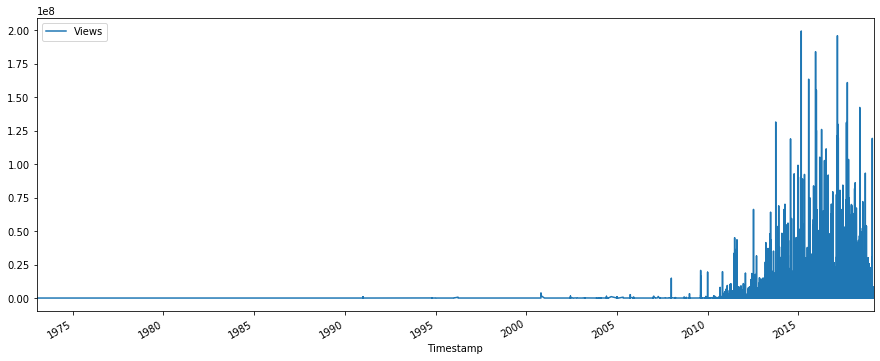

In [47]:
y.plot(figsize=(15, 6))
plt.show()

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined